<a href="https://colab.research.google.com/github/bel001/Estadistica/blob/main/Arboles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación por Árboles de Decisión

 **Instalación de bibliotecas necesarias**

In [ ]:
!pip install scikit-learn matplotlib pandas


**Importar las bibliotecas necesarias**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


**Cargar el dataset de Iris**

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target


**Dividir el conjunto de datos en entrenamiento y prueba**

Esto divide el 70% para entrenar y el 30% para probar el modelo.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Crear el Árbol de Decisión utilizando los criterios de Hunt, C4.5 y J48:
Hunt / C4.5 (usando entropy como criterio):

La entropía(entropy) es una medida de impureza o incertidumbre en un conjunto de datos.

In [ ]:
clf_hunt_c45 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_hunt_c45.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

**J48 (Configurando poda):**

J48 es una implementación de C4.5 con poda: limita la profundidad (max_depth) y el número mínimo de muestras para dividir un nodo.

In [ ]:
clf_j48 = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10, random_state=42)
clf_j48.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10,
                       random_state=42)

**C50 (Configuración similar a C4.5, con poda):**



In [ ]:
clf_c50 = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=12, random_state=42)
clf_c50.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=12,
                       random_state=42)

**Evaluar el rendimiento de los modelos:**

Estas métricas indican qué tan bien predijo cada modelo.

Los valores impresos son:

Hunt / C4.5: 97.78%

J48 y C50: 100%

In [ ]:
y_pred_hunt_c45 = clf_hunt_c45.predict(X_test)
y_pred_j48 = clf_j48.predict(X_test)
y_pred_c50 = clf_c50.predict(X_test)

accuracy_hunt_c45 = accuracy_score(y_test, y_pred_hunt_c45)
accuracy_j48 = accuracy_score(y_test, y_pred_j48)
accuracy_c50 = accuracy_score(y_test, y_pred_c50)

print(f"Precisión de Hunt / C4.5: {accuracy_hunt_c45:.4f}")
print(f"Precisión de J48: {accuracy_j48:.4f}")
print(f"Precisión de C50: {accuracy_c50:.4f}")


Precisión de Hunt / C4.5: 0.9778
Precisión de J48: 1.0000
Precisión de C50: 1.0000


**Visualización de los árboles de decisión**

Esto genera un diagrama que muestra cómo el árbol toma decisiones basadas en las características.

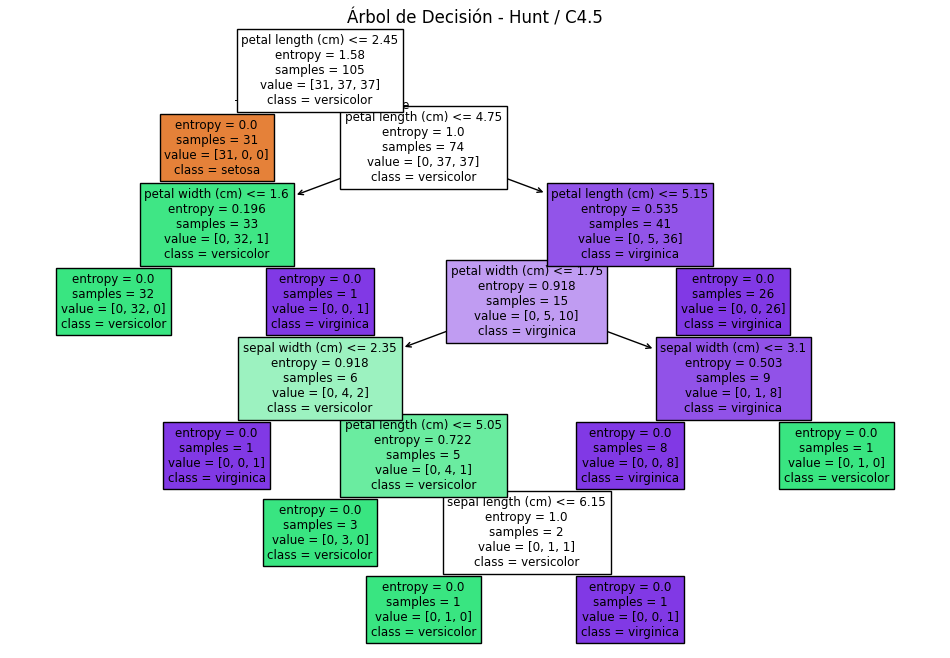

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(clf_hunt_c45, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Árbol de Decisión - Hunt / C4.5")
plt.show()


# **Implementar K-Means en Google Colab**

Este algoritmo segmenta los datos en 3 grupos (clusters) sin usar etiquetas.

In [ ]:
from sklearn.cluster import KMeans

# Crear el modelo de KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# Predecir los clusters
y_kmeans = kmeans.predict(X_test)


**Visualizar los clusters:**

Si el dataset tiene dos características, se puede visualizar en un gráfico 2D:

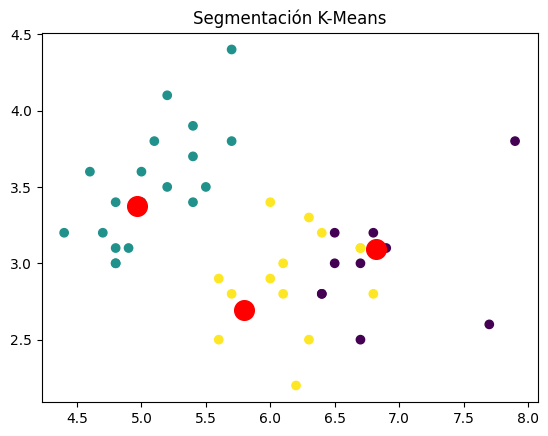

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.title("Segmentación K-Means")
plt.show()


# **Implementar KNN en Google Colab**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Crear el modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Realizar las predicciones
y_pred_knn = knn.predict(X_test)

# Evaluar el rendimiento
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Precisión de KNN: {accuracy_knn:.4f}")


Precisión de KNN: 1.0000
